In [161]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\proj3\autoimmune_flares_dataset.csv")


# You do NOT need to encode the Flare column, it's already 'flare'/'no_flare'

# You can keep other encodings if you want (but your data is already categorical)
def encode_smoking(x):
    return x.lower()

def encode_exercise(x):
    return x.lower()

df["Smoking_cat"] = df["Smoking"].apply(encode_smoking)
df["Exercise_cat"] = df["Exercise"].apply(encode_exercise)

# Build transactions (drop unnecessary .cat columns if you want)
transactions = []
for i, row in df.iterrows():
    t = [
        row["VitaminD"],
        row["Sleep"],
        row["Stress"],
        row["Diet"],
        row["Smoking_cat"],
        row["Exercise_cat"],
        row["Flare"],  # Use as-is!
    ]
    transactions.append(t)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Now you can proceed as before
print(df_encoded.columns)
print(df_encoded["flare"].sum())
print(df_encoded.head())

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
flare_rules = rules[rules['consequents'].apply(lambda x: 'flare' in x)]
flare_rules = flare_rules.sort_values(by='lift', ascending=False)
print(flare_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Index(['balanced_diet', 'flare', 'good_sleep', 'healthy_diet', 'high_stress',
       'high_vitaminD', 'low_stress', 'low_vitaminD', 'moderate_exercise',
       'moderate_stress', 'no_exercise', 'no_flare', 'non_smoker',
       'normal_vitaminD', 'poor_diet', 'poor_sleep', 'regular_exercise',
       'smoker'],
      dtype='object')
73
   balanced_diet  flare  good_sleep  healthy_diet  high_stress  high_vitaminD  \
0          False   True       False          True         True           True   
1          False  False       False          True        False           True   
2          False   True       False         False         True          False   
3           True  False        True         False         True           True   
4           True  False        True         False        False          False   

   low_stress  low_vitaminD  moderate_exercise  moderate_stress  no_exercise  \
0       False         False              False            False         True   
1        True    

In [141]:
print(df_encoded.columns)

Index(['balanced_diet', 'flare', 'good_sleep', 'healthy_diet', 'high_stress',
       'high_vitaminD', 'low_stress', 'low_vitaminD', 'moderate_exercise',
       'moderate_stress', 'no_exercise', 'no_flare', 'non_smoker',
       'normal_vitaminD', 'poor_diet', 'poor_sleep', 'regular_exercise',
       'smoker'],
      dtype='object')


In [145]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

In [147]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                             antecedents  \
0                                        (balanced_diet)   
1                                        (balanced_diet)   
2                                        (balanced_diet)   
3                                        (balanced_diet)   
4                                        (balanced_diet)   
...                                                  ...   
12906  (poor_diet, no_flare, non_smoker, low_stress, ...   
12907  (poor_sleep, poor_diet, low_stress, normal_vit...   
12908  (regular_exercise, poor_diet, low_stress, norm...   
12909  (low_stress, poor_diet, no_flare, normal_vitam...   
12910  (poor_diet, low_stress, normal_vitaminD, non_s...   

                                      consequents  support  confidence  \
0                                    (good_sleep)    0.155    0.492063   
1                                   (high_stress)    0.130    0.412698   
2                                      (no_flare)    0.20

In [163]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time

df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\proj3\autoimmune_flares_dataset.csv")

def encode_smoking(x):
    return x.lower()

def encode_exercise(x):
    return x.lower()

df["Smoking_cat"] = df["Smoking"].apply(encode_smoking)
df["Exercise_cat"] = df["Exercise"].apply(encode_exercise)

transactions = []
for i, row in df.iterrows():
    t = [
        row["VitaminD"],
        row["Sleep"],
        row["Stress"],
        row["Diet"],
        row["Smoking_cat"],
        row["Exercise_cat"],
        row["Flare"]
    ]
    transactions.append(t)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

start = time.time()
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)
end = time.time()
print("FP-Growth runtime:", end-start)

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)
flare_rules_fp = rules_fp[rules_fp['consequents'].apply(lambda x: 'flare' in x)]
flare_rules_fp = flare_rules_fp.sort_values(by='lift', ascending=False)

flare_rules_fp.to_csv("fp_growth_flare_rules.csv", index=False)
print(flare_rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


FP-Growth runtime: 0.7057712078094482
                                    antecedents consequents  support  \
55      (good_sleep, high_vitaminD, non_smoker)     (flare)    0.070   
219            (high_vitaminD, moderate_stress)     (flare)    0.060   
52                  (good_sleep, high_vitaminD)     (flare)    0.105   
115  (good_sleep, regular_exercise, non_smoker)     (flare)    0.060   

     confidence      lift  
55     0.636364  1.743462  
219    0.631579  1.730353  
52     0.600000  1.643836  
115    0.600000  1.643836  


                                    antecedents consequents  support  \
173     (good_sleep, high_vitaminD, non_smoker)     (flare)    0.070   
40             (high_vitaminD, moderate_stress)     (flare)    0.060   
36                  (good_sleep, high_vitaminD)     (flare)    0.105   
180  (good_sleep, regular_exercise, non_smoker)     (flare)    0.060   

     confidence      lift  
173    0.636364  1.743462  
40     0.631579  1.730353  
36     0.600000  1.643836  
180    0.600000  1.643836  


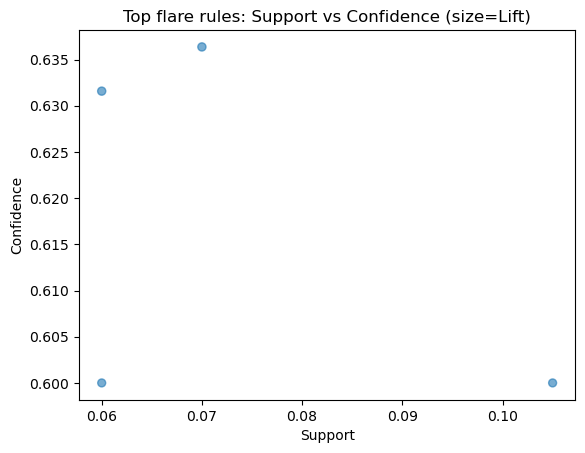

In [183]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
flare_rules = rules[rules['consequents'].apply(lambda x: 'flare' in x)]
flare_rules = flare_rules.sort_values(by='lift', ascending=False)
top_flare_rules = flare_rules.head(10)
print(top_flare_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

plt.scatter(top_flare_rules['support'], top_flare_rules['confidence'], s=top_flare_rules['lift']*20, alpha=0.6)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Top flare rules: Support vs Confidence (size=Lift)")
plt.show()


In [165]:
from mlxtend.frequent_patterns import fpgrowth
import time

start_time = time.time()
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)
fp_runtime = time.time() - start_time
print("FP-Growth runtime:", fp_runtime)


FP-Growth runtime: 0.7281198501586914


In [171]:
import time
from mlxtend.frequent_patterns import apriori, association_rules

start_time = time.time()
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.6)
apriori_runtime = time.time() - start_time

print("Apriori runtime:", apriori_runtime)


Apriori runtime: 0.0448460578918457


In [167]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)
flare_rules_fp = rules_fp[rules_fp['consequents'].apply(lambda x: 'flare' in x)]
flare_rules_fp = flare_rules_fp.sort_values(by='lift', ascending=False)
print(flare_rules_fp[['antecedents','consequents','support','confidence','lift']])


                                    antecedents consequents  support  \
55      (good_sleep, high_vitaminD, non_smoker)     (flare)    0.070   
219            (high_vitaminD, moderate_stress)     (flare)    0.060   
52                  (good_sleep, high_vitaminD)     (flare)    0.105   
115  (good_sleep, regular_exercise, non_smoker)     (flare)    0.060   

     confidence      lift  
55     0.636364  1.743462  
219    0.631579  1.730353  
52     0.600000  1.643836  
115    0.600000  1.643836  


In [173]:

print("Apriori runtime:", apriori_runtime)
print("FP-Growth runtime:", fp_runtime)


Apriori runtime: 0.0448460578918457
FP-Growth runtime: 0.7281198501586914


In [175]:
flare_rules_fp.to_csv("flare_rules_fp_growth.csv", index=False)


In [179]:
!pip install matplotlib-venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=ac87f98c6194776674fbc504b5ee46a2027bc4508533dee64bc27916fe9f35ff
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


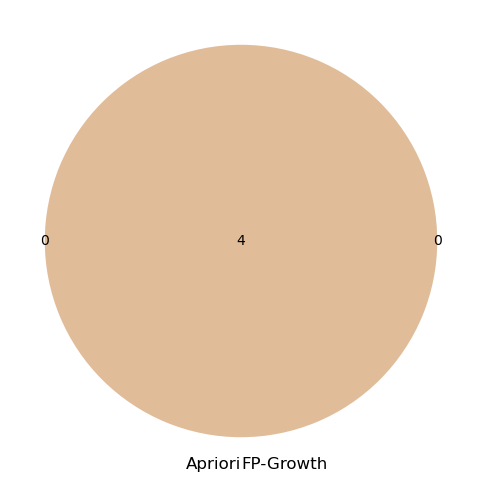

In [181]:
from matplotlib_venn import venn2
apriori_rule_set = set(flare_rules['antecedents'].astype(str) + "->" + flare_rules['consequents'].astype(str))
fp_rule_set = set(flare_rules_fp['antecedents'].astype(str) + "->" + flare_rules_fp['consequents'].astype(str))

plt.figure(figsize=(6,6))
venn2([apriori_rule_set, fp_rule_set], set_labels=("Apriori","FP-Growth"))
plt.show()


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\proj3\autoimmune_flares_dataset.csv")
df['flare'] = df['Flare'].apply(lambda x: 1 if x.strip().lower() == 'flare' else 0)
for col in ['VitaminD', 'Sleep', 'Stress', 'Diet', 'Smoking', 'Exercise']:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[['VitaminD', 'Sleep', 'Stress', 'Diet', 'Smoking', 'Exercise']]
y = df['flare']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train target value counts:\n", y_train.value_counts())
print("Test target value counts:\n", y_test.value_counts())
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
if len(clf.classes_) == 2:
    y_prob = clf.predict_proba(X_test)[:, 1]
else:
    y_prob = clf.predict_proba(X_test)[:, 0]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
feat_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feat_importance)

Train target value counts:
 flare
0    102
1     58
Name: count, dtype: int64
Test target value counts:
 flare
0    25
1    15
Name: count, dtype: int64
Accuracy: 0.675
F1 Score: 0.48
ROC-AUC: 0.6359999999999999
Confusion Matrix:
 [[21  4]
 [ 9  6]]
Feature Importance:
 Diet        0.201044
Stress      0.196417
VitaminD    0.187942
Exercise    0.185573
Sleep       0.122536
Smoking     0.106488
dtype: float64


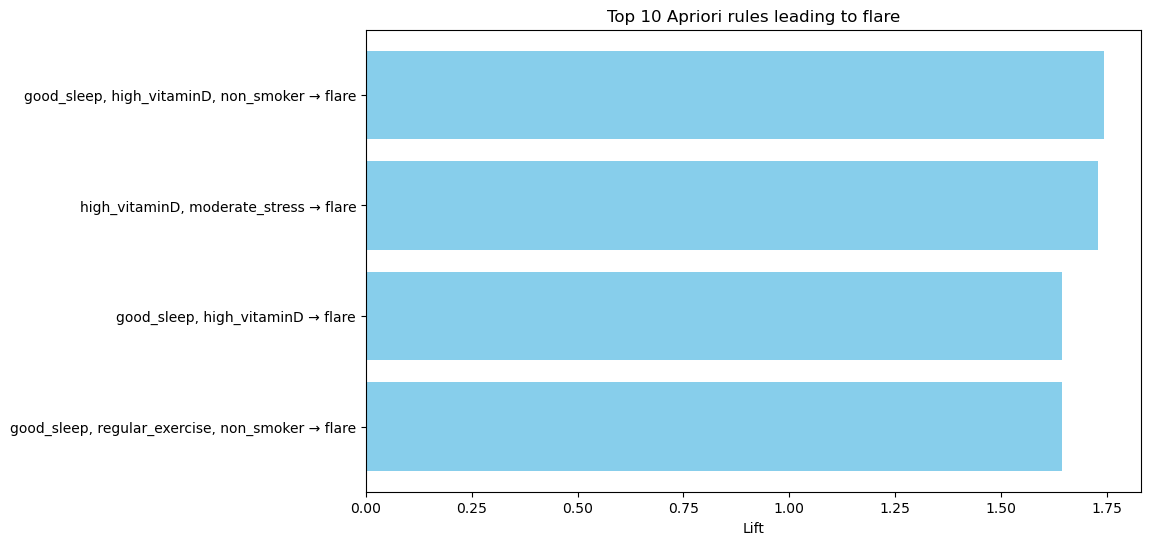

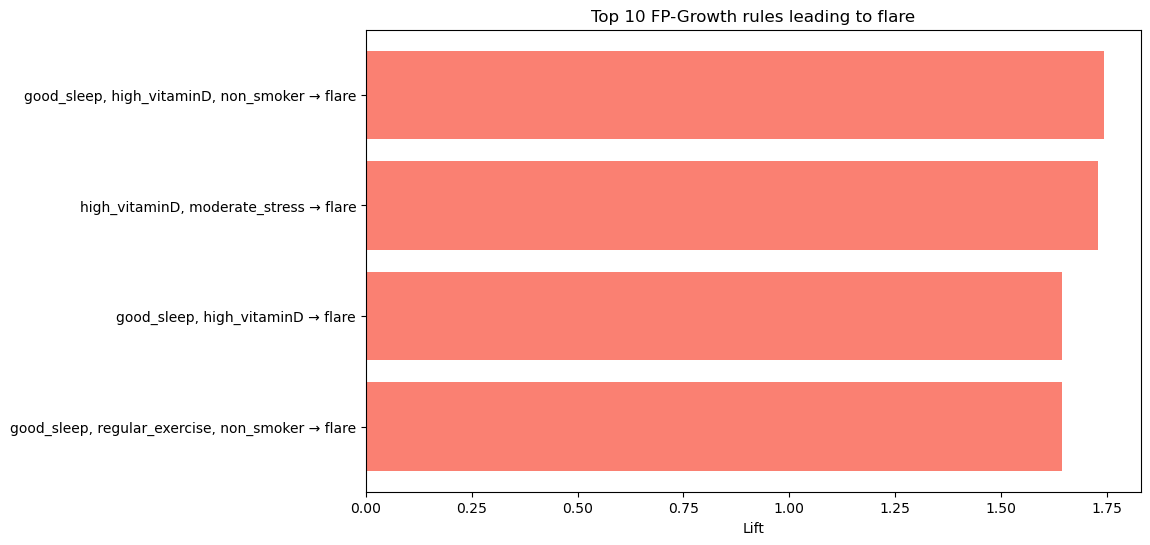

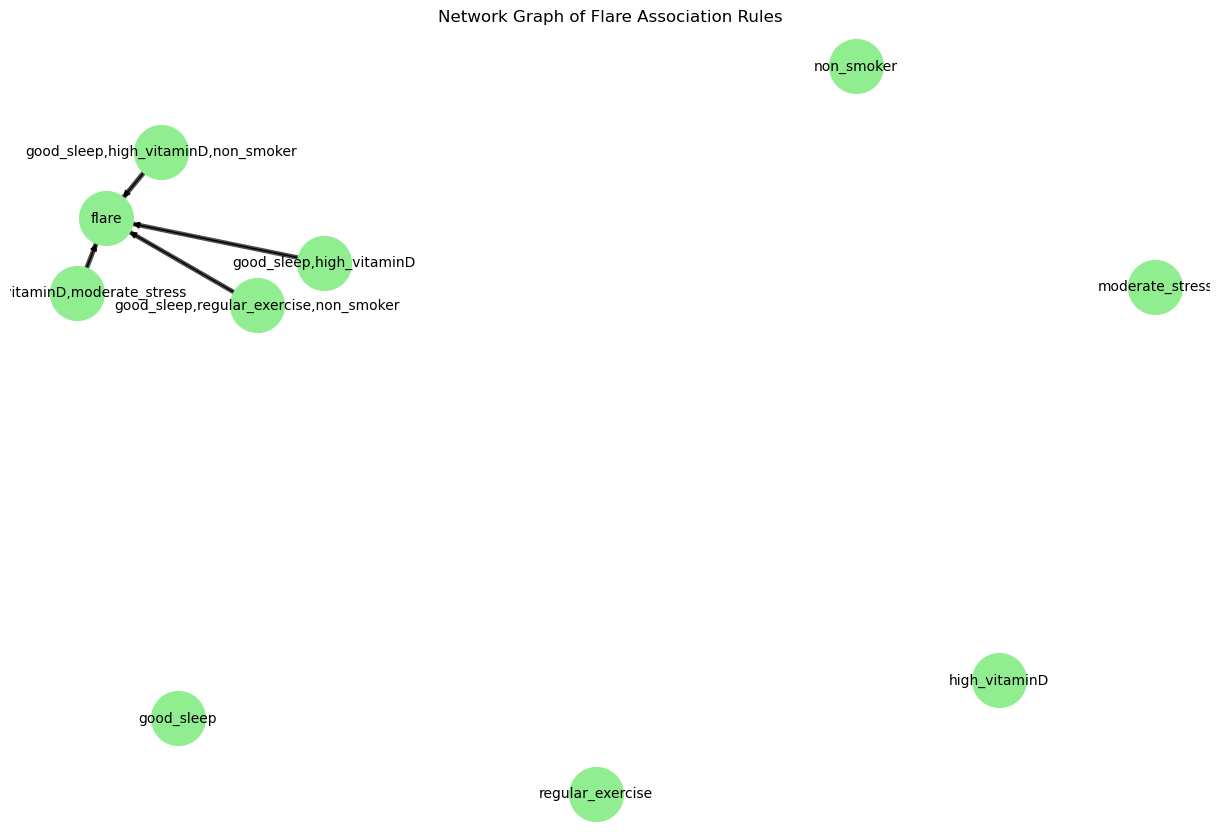

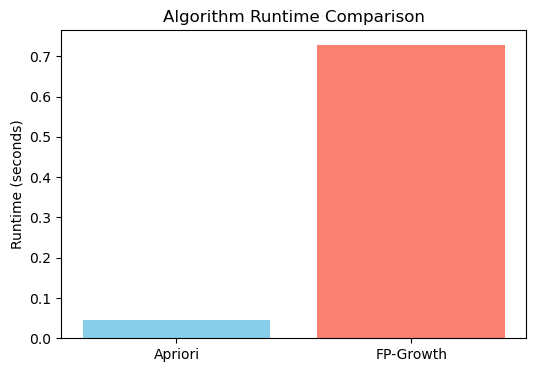

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

top10_apriori = flare_rules.head(10)
plt.figure(figsize=(10,6))
plt.barh(range(len(top10_apriori)), top10_apriori['lift'], color='skyblue')
plt.yticks(range(len(top10_apriori)), [', '.join(map(str, a)) + " → flare" for a in top10_apriori['antecedents']])
plt.xlabel("Lift")
plt.title("Top 10 Apriori rules leading to flare")
plt.gca().invert_yaxis()
plt.show()

top10_fp = flare_rules_fp.head(10)
plt.figure(figsize=(10,6))
plt.barh(range(len(top10_fp)), top10_fp['lift'], color='salmon')
plt.yticks(range(len(top10_fp)), [', '.join(map(str, a)) + " → flare" for a in top10_fp['antecedents']])
plt.xlabel("Lift")
plt.title("Top 10 FP-Growth rules leading to flare")
plt.gca().invert_yaxis()
plt.show()

G = nx.DiGraph()
for _, row in flare_rules.iterrows():
    for item in row['antecedents']:
        G.add_node(item)
    G.add_node('flare')
    G.add_edge(','.join(row['antecedents']), 'flare', weight=row['lift'])

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10)
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw_networkx_edges(G, pos, width=[w*2 for w in weights], alpha=0.7)
plt.title("Network Graph of Flare Association Rules")
plt.show()

algorithms = ['Apriori', 'FP-Growth']
runtimes = [apriori_runtime, fp_runtime]
plt.figure(figsize=(6,4))
plt.bar(algorithms, runtimes, color=['skyblue','salmon'])
plt.ylabel("Runtime (seconds)")
plt.title("Algorithm Runtime Comparison")
plt.show()

flare_rules.to_csv("apriori_flare_rules.csv", index=False)
flare_rules_fp.to_csv("fp_growth_flare_rules.csv", index=False)
